In [37]:
include("comum.jl")
include("modelos.jl")
using Evolutionary, Plots;
pyplot();

In [38]:
Ts = 0.08
tend = 2.0
t0 = 0.0
popul  = 10   # população
iterac = 3 #iterações
xr = SVector{7}([1.,1.,0.5,0.6,0.5,1.2,0.8]);

In [39]:
function gerador(n)
    out = rand(n)
    for a = 1:n
        out[a] = out[a]*shuffle([1000., 100., 1000., 100.])[1]
    end    
    out
end;

In [40]:
function custo(gain::Vector{Float64})
    kp = SMatrix{7,7}(diagm(gain[1:7]))
    kv = SMatrix{7,7}(diagm(gain[8:end]))
    x, v, t, a, ta, j, tj = kukaRobot(kp, kv, Ts, t0, tend, xr)
    sizeVector = length(x[1])

    erro_sum = 0.
    for i=1:7
        erro = -(x[i]-xr[i])
        erro_sum = erro_sum + sum(abs.(erro[floor(Integer,sizeVector/3):end])) 
    end

    jerk_sum = 0.
    for i=1:7
        jerk_sum = jerk_sum + sum(abs.(j[i]))
    end

    
    erro_sum = erro_sum * 10.
    jerk_sum = jerk_sum * 0.01

    out =  erro_sum + jerk_sum
    #println("$(erro_sum) + $(jerk_sum)")
    out
end;

In [41]:
N = 14
result, fitness, cnt = ga(custo, N; initPopulation = gerador, populationSize = popul, ɛ = 0.1, selection = roulette, crossover = intermediate(0.25), mutation = domainrange(fill(0.5,N)), iterations = iterac)

LoadError: [91mBoundsError: attempt to access 2-element Array{Float64,1} at index [0:2][39m

In [42]:
t_end_new = tend + 2
kp = SMatrix{7,7}(diagm(result[1:7]))
kv = SMatrix{7,7}(diagm(result[8:end]))

x, v, t, a, ta, j, tj = kukaRobot(kp, kv, Ts, t0, t_end_new, xr);

In [43]:
for i=1:7
    erro = xr[i] - x[i][end]
    println("erro final $(i) = $(erro)")
end   

erro final 1 = -0.00010250533600042466
erro final 2 = -0.8793097259841274
erro final 3 = -0.03905351204597862
erro final 4 = 0.2528638089839341
erro final 5 = 0.027725612432446645
erro final 6 = -0.003781299108079228
erro final 7 = 4.99693917810351e-6


In [44]:
function plotx(i)
    p1 = plot(t,x[i], label = "desejado")
    p1= plot!([xr[i]],seriestype= :hline, label = "referência");
end    

plotx (generic function with 1 method)

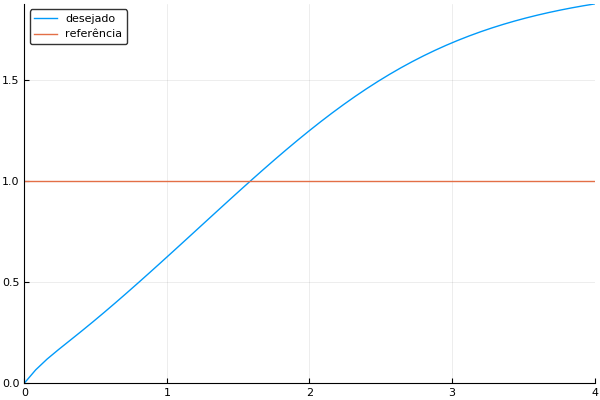

In [45]:
plotx(2)